<a href="https://colab.research.google.com/github/a-donat/Benchmarks_PyCaret/blob/main/Predicting_London_Weekday_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Set-Up

## I.A. Import Libraries and Download Data

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d thedevastator/airbnb-prices-in-european-cities
! unzip '/content/airbnb-prices-in-european-cities.zip' -d '/content/data'

In [ ]:
! pip install pycaret

In [3]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import VisualizeDataAbbrev as viz

import numpy as np
import pandas as pd
from pycaret.regression import *
from sklearn.model_selection import train_test_split

## I.B. Load Data and Check Data Integrity

In [108]:
ds_df = pd.read_csv("/content/data/london_weekdays.csv")
# https://zenodo.org/record/4446043#.ZEV8d-zMI-R

In [109]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4614 entries, 0 to 4613
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4614 non-null   int64  
 1   realSum                     4614 non-null   float64
 2   room_type                   4614 non-null   object 
 3   room_shared                 4614 non-null   bool   
 4   room_private                4614 non-null   bool   
 5   person_capacity             4614 non-null   float64
 6   host_is_superhost           4614 non-null   bool   
 7   multi                       4614 non-null   int64  
 8   biz                         4614 non-null   int64  
 9   cleanliness_rating          4614 non-null   float64
 10  guest_satisfaction_overall  4614 non-null   float64
 11  bedrooms                    4614 non-null   int64  
 12  dist                        4614 non-null   float64
 13  metro_dist                  4614 

In [110]:
ds_df = ds_df.drop(columns=["Unnamed: 0"]).copy()

In [111]:
ds_df.nunique()

realSum                       1752
room_type                        3
room_shared                      2
room_private                     2
person_capacity                  5
host_is_superhost                2
multi                            2
biz                              2
cleanliness_rating               9
guest_satisfaction_overall      47
bedrooms                         7
dist                          4614
metro_dist                    4614
attr_index                    4614
attr_index_norm               4614
rest_index                    4614
rest_index_norm               4614
lng                           4006
lat                           3544
dtype: int64

In [112]:
ds_df.corr().round(2)

<ipython-input-112-5fd8ea8afd93>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds_df.corr().round(2)


,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
realSum,1.00,-0.02,-0.32,0.32,-0.00,-0.05,0.07,0.02,0.01,0.29,-0.20,-0.14,0.26,0.26,0.24,0.24,-0.10,0.06
room_shared,-0.02,1.00,-0.08,-0.01,-0.01,-0.00,-0.02,-0.02,-0.02,-0.02,0.04,0.06,-0.02,-0.02,-0.02,-0.02,0.05,-0.03
room_private,-0.32,-0.08,1.00,-0.55,0.11,0.13,-0.18,0.04,0.10,-0.20,0.18,0.15,-0.17,-0.17,-0.19,-0.19,0.16,-0.11
person_capacity,0.32,-0.01,-0.55,1.00,-0.08,-0.06,0.20,-0.07,-0.08,0.57,-0.11,-0.07,0.11,0.11,0.12,0.12,-0.05,0.08
host_is_superhost,-0.00,-0.01,0.11,-0.08,1.00,0.15,-0.16,0.22,0.22,0.01,0.05,0.04,-0.05,-0.05,-0.05,-0.05,-0.01,-0.04
multi,-0.05,-0.00,0.13,-0.06,0.15,1.00,-0.52,0.07,0.10,0.02,0.10,0.09,-0.10,-0.10,-0.10,-0.10,0.02,-0.06
biz,0.07,-0.02,-0.18,0.20,-0.16,-0.52,1.00,-0.19,-0.28,-0.03,-0.27,-0.26,0.27,0.27,0.28,0.28,-0.07,0.14
cleanliness_rating,0.02,-0.02,0.04,-0.07,0.22,0.07,-0.19,1.00,0.76,0.04,0.06,0.06,-0.03,-0.03,-0.04,-0.04,-0.00,-0.05
guest_satisfaction_overall,0.01,-0.02,0.10,-0.08,0.22,0.10,-0.28,0.76,1.00,0.06,0.09,0.10,-0.06,-0.06,-0.07,-0.07,0.03,-0.04
bedrooms,0.29,-0.02,-0.20,0.57,0.01,0.02,-0.03,0.04,0.06,1.00,0.02,0.05,0.01,0.01,0.00,0.00,0.02,-0.01



# II. Preprocessing

In [113]:
train_df, test_df = train_test_split(
    ds_df, test_size=0.20, random_state=1)

# III. Create Models

In [114]:
reg_models = setup(data=train_df, target="realSum", session_id=123,
                   ignore_features=["attr_index", "rest_index", "lat", "lng"])


,Description,Value
0,Session id,123
1,Target,realSum
2,Target type,Regression
3,Original data shape,"(3691, 19)"
4,Transformed data shape,"(3691, 17)"
5,Transformed train set shape,"(2583, 17)"
6,Transformed test set shape,"(1108, 17)"
7,Ignore features,4
8,Numeric features,10
9,Categorical features,1


In [115]:
best_model = compare_models(fold=5)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,112.8299,218134.3803,384.1414,0.3574,0.4070,0.2796,0.4300
par,Passive Aggressive Regressor,130.6788,215063.3926,384.2721,0.3428,0.4644,0.3923,0.2740
br,Bayesian Ridge,130.7303,211684.7176,383.1626,0.3371,0.5159,0.3851,0.2660
lasso,Lasso Regression,131.2008,211841.9631,383.4459,0.3357,0.5278,0.3862,0.2520
llar,Lasso Least Angle Regression,131.1987,211842.1634,383.4463,0.3357,0.5278,0.3862,0.1520
ridge,Ridge Regression,132.6192,211856.0131,383.8467,0.3325,0.5447,0.3919,0.1480
lr,Linear Regression,132.6757,211858.4646,383.8642,0.3324,0.5435,0.3921,1.2140
lar,Least Angle Regression,132.6757,211858.4646,383.8642,0.3324,0.5435,0.3921,0.1540
en,Elastic Net,129.4296,216631.4106,388.2843,0.3193,0.4596,0.3917,0.1500
lightgbm,Light Gradient Boosting Machine,128.9848,210898.2837,389.8756,0.2772,0.4472,0.3677,0.9640


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

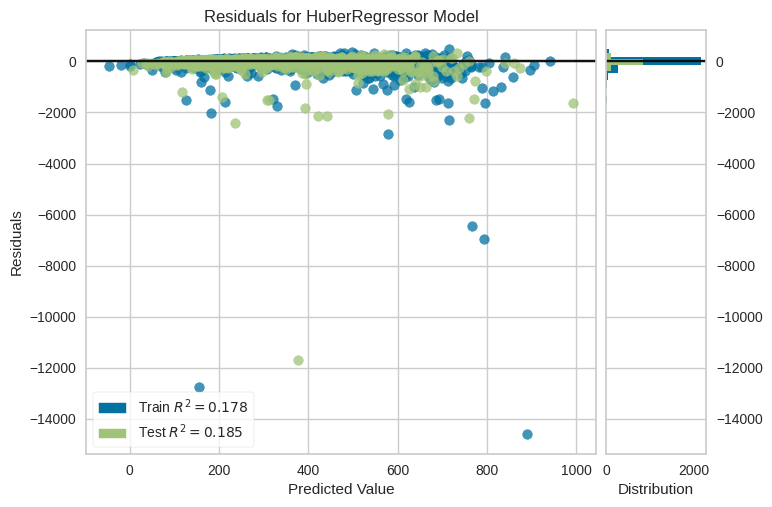

In [116]:
plot_model(best_model)

In [118]:
huber = create_model("huber")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,99.0469,58472.4770,241.8108,0.3797,0.4021,0.2836
1,98.5127,32863.0297,181.2816,0.5749,0.3905,0.3024
2,118.5897,213628.8717,462.2000,0.2268,0.4057,0.2733
3,110.2631,49135.1568,221.6645,0.4911,0.3857,0.2736
4,80.8932,13192.9341,114.8605,0.7006,0.3488,0.2761
5,76.3880,13722.1294,117.1415,0.6206,0.3308,0.2617
6,96.5114,33991.5681,184.3680,0.4952,0.3824,0.2535
7,132.2095,202828.1069,450.3644,0.2327,0.4302,0.3004
8,101.1761,54471.5404,233.3914,0.4204,0.3976,0.2913


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [122]:
tuned_huber = tune_model(huber)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,100.1421,57619.8983,240.0415,0.3887,0.4071,0.2966
1,99.2585,32735.8353,180.9305,0.5766,0.3962,0.3113
2,118.4014,212586.7378,461.0713,0.2306,0.4395,0.2799
3,110.1538,48263.7099,219.6900,0.5001,0.3879,0.2793
4,81.4735,13111.3191,114.5047,0.7025,0.3533,0.2837
5,76.9699,13504.3998,116.2084,0.6267,0.3332,0.2697
6,97.0528,33754.9336,183.7252,0.4987,0.3823,0.2605
7,133.1381,201387.9393,448.7627,0.2382,0.4360,0.3103
8,100.9717,54223.2353,232.8588,0.4231,0.3996,0.2967


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [123]:
preds_huber = predict_model(tuned_huber, train_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,114.5809,205795.8971,453.6473,0.1849,0.4132,0.2822


In [124]:
preds_huber["residual"] = preds_huber["realSum"] - preds_huber["prediction_label"]
preds_huber["scaled_residual"] = preds_huber["residual"] / preds_huber["realSum"]

In [73]:
import matplotlib.pyplot as plt

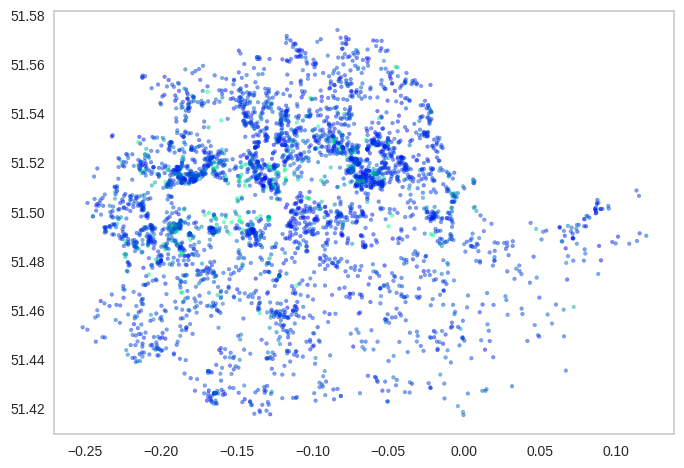

In [125]:
plt.grid(False)
plt.scatter(
    data=preds_huber, x="lng", y="lat",
    c=preds_huber["residual"].clip(
        preds_huber["residual"].quantile(.02),
        preds_huber["residual"].quantile(.98)),
    alpha=.5, cmap="winter", s=7)

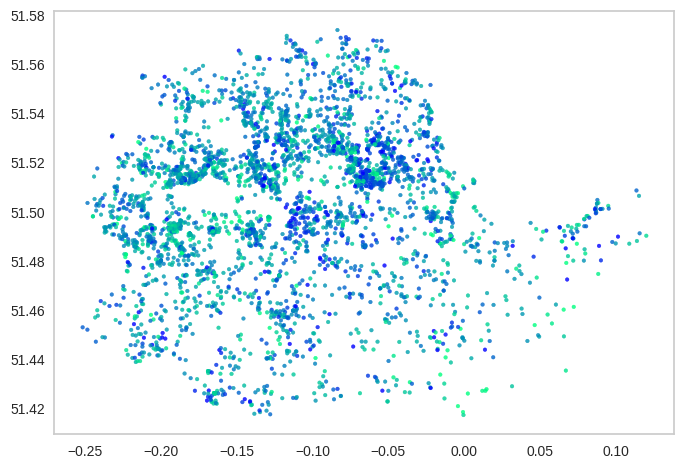

In [126]:
plt.grid(False)
plt.scatter(
    data=preds_huber, x="lng", y="lat",
    c=preds_huber["scaled_residual"].clip(
        preds_huber["scaled_residual"].quantile(.02),
        preds_huber["scaled_residual"].quantile(.98)),
    alpha=.8, cmap="winter", s=7)

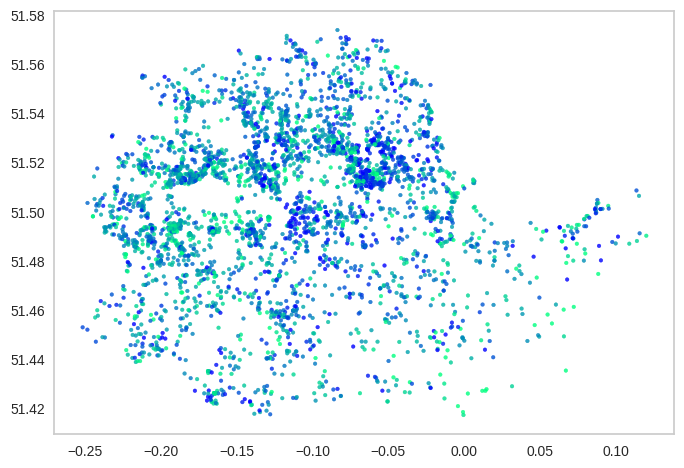

In [127]:
plt.grid(False)
plt.scatter(
    data=preds_huber, x="lng", y="lat",
    c=preds_huber["scaled_residual"].clip(
        preds_huber["scaled_residual"].quantile(.05),
        preds_huber["scaled_residual"].quantile(.95)),
    alpha=.8, cmap="winter", s=7)

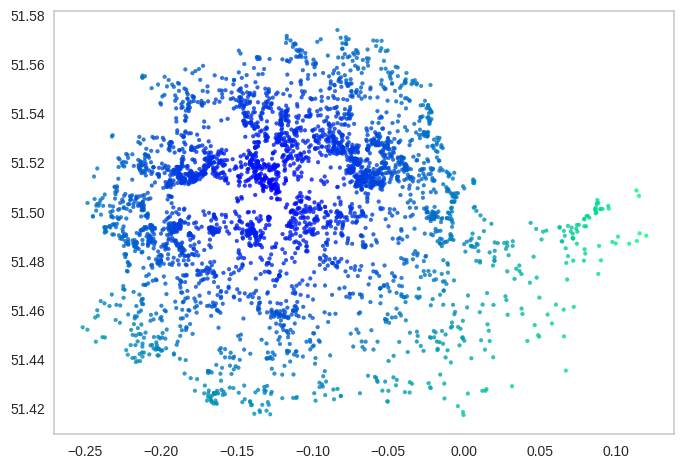

In [128]:
plt.grid(False)
plt.scatter(
    data=preds_huber, x="lng", y="lat",
    c=preds_huber["dist"],
    alpha=.8, cmap="winter", s=7)